# Porto Seguro’s Safe Driver Prediction

Yepyeni bir araba satın almanın heyecanını, yeni sigorta faturanızı görmekten daha hızlı mahveden hiçbir şey yoktur. İyi bir sürücü olduğunuzu bildiğinizde acı daha da acı verici olur. Yıllardır yolda dikkatli davrandıysanız bu kadar çok ödemeniz adil görünmüyor.

Brezilya'nın en büyük otomobil ve ev sahibi sigorta şirketlerinden biri olan Porto Seguro da buna tamamen katılıyor. Otomobil sigorta şirketlerinin hasar tahminlerindeki yanlışlıklar iyi sürücüler için sigorta maliyetini artırıyor ve kötü sürücüler için fiyatı düşürüyor.

Bu projede, bir sürücünün gelecek yıl bir oto sigortası talebinde bulunma olasılığını tahmin eden bir model oluşturacağız.

<img src="https://safestart.com/wp-content/uploads/2019/01/DrivingACar-780x480.jpg">

<a href="https://www.kaggle.com/competitions/porto-seguro-safe-driver-prediction/data">Dataya Buradan Erişebilirsiniz</a>

### EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",100)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [4]:
df.shape

(595212, 59)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [6]:
df.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


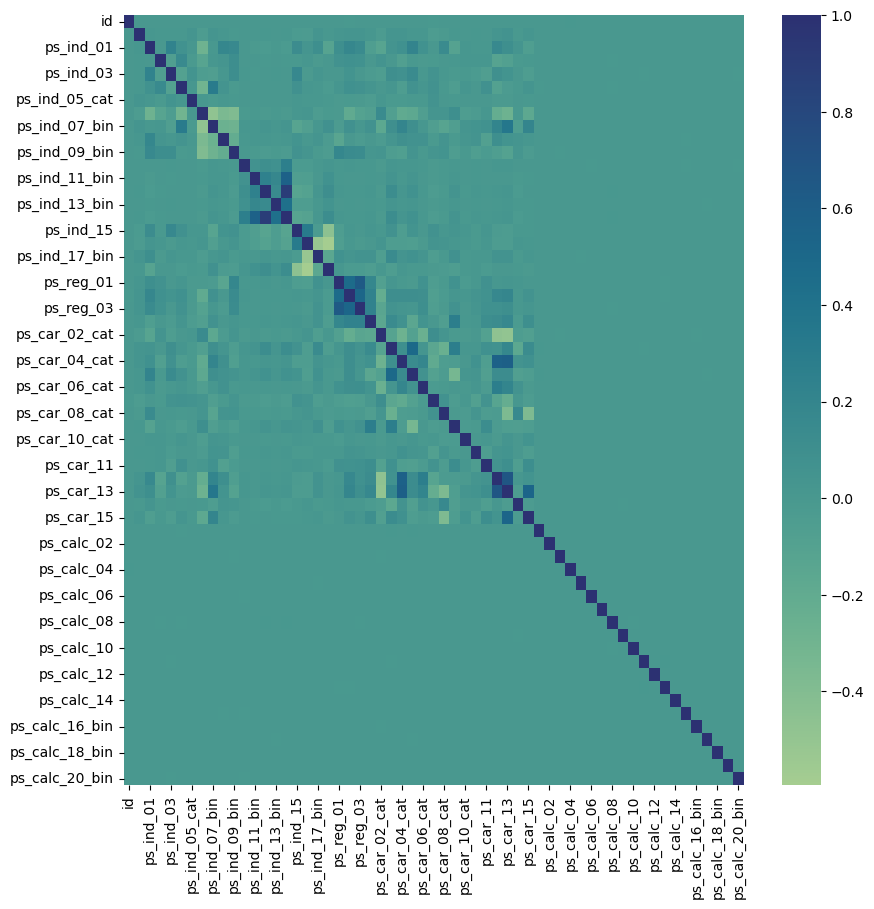

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),annot=False, cmap="crest");

In [8]:
df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.0000

<Axes: xlabel='target', ylabel='count'>

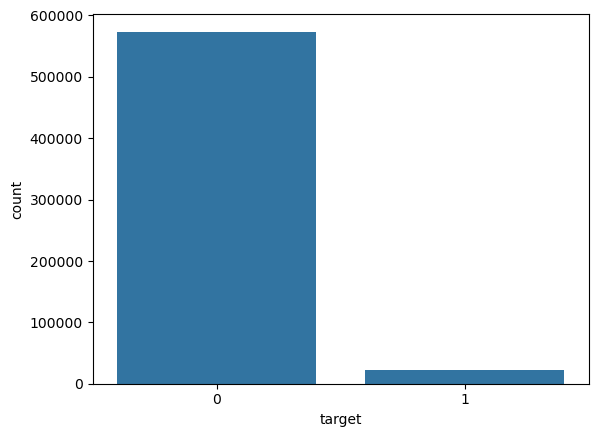

In [9]:
sns.countplot(x=df["target"])

<b>Verimiz Imbalance oldugu icin biraz dengeledik</b>

In [10]:
sif=df[df["target"]==0].sample(200000)
bir=df[df["target"]==1].sample(200000,replace=True)

In [11]:
df=pd.concat([sif,bir], ignore_index=True)

In [12]:
df

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,1368421,0,2,1,4,0,0,0,1,0,0,0,0,0,0,0,2,0,0,1,0.1,0.4,-1.000000,8,1,-1,8,0,11,1,1,0,1,71,2,0.489898,1.255137,0.494975,3.605551,0.8,0.2,0.0,2,1,8,7,11,2,6,6,2,6,7,1,1,1,0,1,0
1,549595,0,0,1,2,1,0,1,0,0,0,0,0,0,0,0,11,1,0,0,0.3,0.0,0.652399,7,1,0,0,1,11,1,1,2,1,104,2,0.446990,0.446890,0.335410,0.000000,0.8,0.3,0.8,3,3,9,3,7,3,14,2,0,5,8,0,1,0,0,1,0
2,1326932,0,5,1,10,1,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.9,0.9,0.756224,7,1,0,0,1,11,1,1,2,1,7,3,0.424264,0.684676,0.354260,2.236068,0.9,0.4,0.4,3,4,9,2,10,2,7,5,1,0,6,0,1,1,0,0,0
3,383735,0,0,2,0,1,-1,1,0,0,0,0,0,0,0,0,8,1,0,0,0.2,0.2,-1.000000,7,1,0,0,1,11,-1,1,3,1,103,1,0.316070,0.519834,0.288791,2.000000,0.3,0.9,0.0,4,2,9,4,8,2,6,6,1,3,6,0,1,0,0,0,0
4,1393158,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,6,1,0,0,0.9,0.4,1.040733,11,1,0,0,0,4,0,1,2,1,104,3,0.400000,0.579612,0.317017,2.236068,0.9,0.2,0.6,2,3,7,7,8,3,9,9,2,3,10,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,214713,1,1,2,2,0,0,0,0,0,1,0,0,0,0,0,8,1,0,0,0.9,0.8,1.476482,11,1,-1,0,-1,11,1,1,2,1,44,1,0.447214,0.720881,0.406202,2.645751,0.0,0.0,0.5,1,2,4,2,9,4,6,5,0,2,10,0,0,0,0,0,0
399996,1016547,1,6,1,6,1,0,0,1,0,0,0,0,0,0,0,5,1,0,0,0.6,0.7,1.188486,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.789942,0.385487,3.162278,0.1,0.5,0.4,3,2,6,3,9,3,13,4,2,3,7,0,1,0,0,1,1
399997,133463,1,0,1,2,1,0,0,0,0,1,0,0,0,0,0,7,0,0,1,0.7,0.3,0.601041,11,1,0,0,1,1,1,1,2,1,70,3,0.424264,0.805008,0.339116,2.828427,0.3,0.0,0.4,3,2,7,3,10,2,11,4,1,8,5,0,1,1,0,1,0
399998,258268,1,0,1,8,0,0,0,0,0,1,0,0,0,0,0,11,1,0,0,0.7,0.2,0.574456,7,1,-1,0,-1,0,1,1,2,1,32,3,0.316228,0.640167,0.361525,3.000000,0.9,0.6,0.9,1,0,8,4,8,0,7,5,0,2,9,0,0,0,0,0,1


### Modelling

In [13]:
x=df.drop("target",axis=1)
y=df["target"]

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test_classification(X, y):
    # Bütün sınıflandırma modellerini tanımlıyorum
    lr = LogisticRegression()
    svc = SVC()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    gb = GradientBoostingClassifier()
    xgb = XGBClassifier()
    mlp = MLPClassifier()

    algos = [lr, svc, knn, dt, rf, gb, xgb, mlp]
    algo_names = ['Logistic Regression', 'SVC', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'MLP']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    accuracy = []
    precision = []
    recall = []
    f1 = []

    # Sonuç tablosunu oluşturuyorum
    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=algo_names)

    for algo in algos:
        algo.fit(X_train, y_train)
        y_pred = algo.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        f1.append(f1_score(y_test, y_pred))

    # Sonuçları result tablosuna ekliyorum
    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1'] = f1

    # Sonuçları doğruluk oranına göre sıralayıp döndürüyorum
    return result.sort_values('Accuracy', ascending=False)

In [15]:
algo_test_classification(x, y)

,Accuracy,Precision,Recall,F1
Random Forest,0.999663,0.999700,0.999625,0.999662
Decision Tree,0.939775,0.892639,0.999625,0.943107
KNN,0.837037,0.760190,0.984105,0.857776
XGBoost,0.706788,0.709619,0.698766,0.704151
Gradient Boosting,0.603575,0.609267,0.574708,0.591483
Logistic Regression,0.556338,0.556186,0.552079,0.554125
SVC,0.501175,0.500528,0.510626,0.505526
MLP,0.499688,0.499525,0.999700,0.666177


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [59]:
dt = DecisionTreeClassifier()

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [61]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [62]:
thmn=knn.predict(x_test)

In [63]:
accuracy_score(y_test, thmn)

0.4993625

<Axes: >

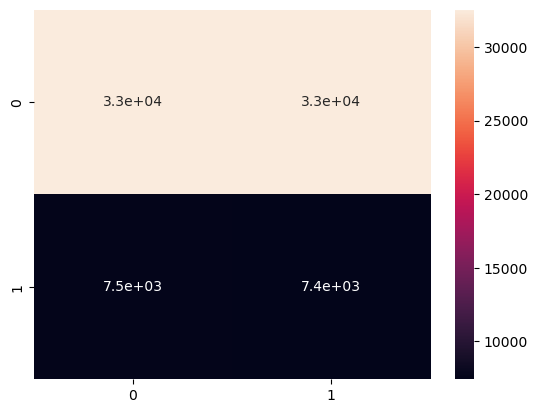

In [64]:
sns.heatmap(confusion_matrix(thmn,y_test),annot=True)

In [65]:
print(classification_report(thmn,y_test))

              precision    recall  f1-score   support

           0       0.81      0.50      0.62     65064
           1       0.19      0.50      0.27     14936

    accuracy                           0.50     80000
   macro avg       0.50      0.50      0.44     80000
weighted avg       0.70      0.50      0.55     80000



Kaggle daki test dosyamızı yükleyip tahmin ettireceğiz.

In [66]:
test=pd.read_csv("test.csv")

In [67]:
dosya=pd.DataFrame()

In [68]:
dosya["id"]=test["id"]

In [69]:
dosya["target"]=dt.predict(test)

In [70]:
dosya.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [71]:
dosya.to_csv("tahmin1.csv",index=False)

### Deep Learning

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [52]:
from sklearn.preprocessing import normalize, scale

In [53]:
model=Sequential()
model.add(Dense(120,activation="relu"))  # Modele layer ekliyor # Dense bütün nöronlar bütün nöronlara bağlansın demek
model.add(Dense(80,activation="relu")) # 120 nöron var 
model.add(Dense(64,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="sigmoid")) # Binary classification olduğu için sigmoid kullandık ! Regression da yok
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"]) # Loss: hata MSE gibi # Optimizer=adam 

In [54]:
x=scale(x) # hepsini aynı birime getirdik

In [55]:
history=model.fit(x,y,epochs=75,batch_size=23, validation_split=.20, verbose=1)

Epoch 1/75
13914/13914 ━━━━━━━━━━━━━━━━━━━━ 15s 874us/step - accuracy: 0.6367 - loss: 0.6418 - val_accuracy: 0.2974 - val_loss: 0.8695
Epoch 2/75
13914/13914 ━━━━━━━━━━━━━━━━━━━━ 11s 824us/step - accuracy: 0.6571 - loss: 0.6198 - val_accuracy: 0.3306 - val_loss: 0.9249
Epoch 3/75
13914/13914 ━━━━━━━━━━━━━━━━━━━━ 11s 803us/step - accuracy: 0.6807 - loss: 0.5911 - val_accuracy: 0.5205 - val_loss: 0.8007
Epoch 4/75
13914/13914 ━━━━━━━━━━━━━━━━━━━━ 11s 804us/step - accuracy: 0.7025 - loss: 0.5628 - val_accuracy: 0.5115 - val_loss: 0.8449
Epoch 5/75
13914/13914 ━━━━━━━━━━━━━━━━━━━━ 11s 822us/step - accuracy: 0.7213 - loss: 0.5372 - val_accuracy: 0.5475 - val_loss: 0.8118
Epoch 6/75
13914/13914 ━━━━━━━━━━━━━━━━━━━━ 11s 816us/step - accuracy: 0.7385 - loss: 0.5151 - val_accuracy: 0.6202 - val_loss: 0.7313
Epoch 7/75
13914/13914 ━━━━━━━━━━━━━━━━━━━━ 12s 830us/step - accuracy: 0.7486 - loss: 0.4980 - val_accuracy: 0.5591 - val_loss: 0.8475
Epoch 8/75
13914/13914 ━━━━━━━━━━━━━━━━━━━━ 11s 798us/s

In [56]:
dosya["target"]=model.predict(test)

27901/27901 ━━━━━━━━━━━━━━━━━━━━ 14s 509us/step


In [57]:
dosya.to_csv("tahmin2.csv",index=False)

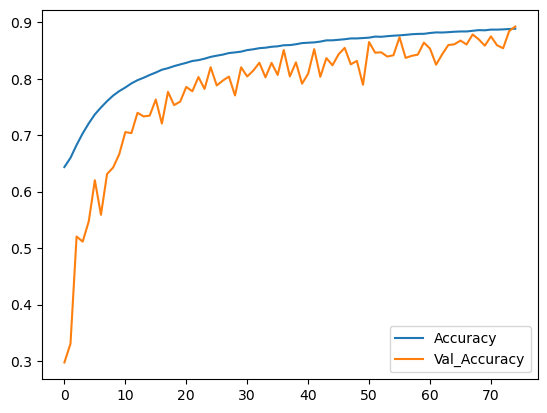

In [58]:
plt.plot(history.history["accuracy"],label="Accuracy")    
plt.plot(history.history["val_accuracy"],label="Val_Accuracy")
plt.legend()

Sonuc olarak kullanıcıların gelecek yıld oto sigortası yapıp yapmayacaklarını tahmin eden bir model yaptık. modelimizi hem ML hem de DL kullanrak eğitik 